# Python Projet 5 - Exploration et nettoyage des données


Dans le cadre du cours OpenClassrooms Machine Learning et du projet d'évaluation #5, ce notebook présente l'analyse exploratoire ainsi qu'un rapide nettoyage des données du dataset pour déterminer quelles variables pourraient être intéressantes pour la suite.

Author : Vincent Arrigoni, 04/2023

Regexp : https://www.debuggex.com/cheatsheet/regex/python

Tout savoir :https://datascientest.com/regex-tout-savoir

Test regexp : https://regex101.com/

## Nettoyage des données

Extract procedure on Stack Exchange Explorer

```
SELECT TOP 5000 Title, Body, Tags, Id, Score, ViewCount, AnswerCount, CommentCount
FROM Posts
WHERE PostTypeId = 1 AND ViewCount > 10 AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5
```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import of libraries
!pip install matplotlib
!pip install pandas
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
ds = pd.read_csv('/content/drive/MyDrive/OCS/Projet5/QueryResults.csv')

In [4]:
ds.isnull().sum()

Title           0
Body            0
Tags            0
Id              0
Score           0
ViewCount       0
AnswerCount     0
CommentCount    0
dtype: int64

In [5]:
ds = ds.dropna()
ds = shuffle(ds)
ds.describe()

,Id,Score,ViewCount,AnswerCount,CommentCount
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,1.665151e+07,50.625800,4.768096e+04,4.899000,2.079200
std,1.902183e+07,253.051703,1.847262e+05,5.132881,3.182602
min,1.958900e+04,6.000000,5.100000e+01,1.000000,0.000000
25%,7.920470e+05,8.000000,4.235250e+03,2.000000,0.000000
50%,1.619128e+06,12.000000,1.084850e+04,3.000000,1.000000
75%,3.795770e+07,26.000000,3.112350e+04,6.000000,3.000000
max,5.817597e+07,9239.000000,7.517297e+06,98.000000,40.000000


In [6]:
ds.head(10)

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CommentCount
587,Sql Server string to date conversion,<p>I want to convert a string like this:</p>\n...,<sql-server><tsql><datetime><sql-server-2005><...,207190,214,1094027,17,2
1625,Instantiating a python class in C#,<p>I've written a class in python that I want ...,<c#><.net><python><ironpython><cross-language>,579272,44,20893,4,0
2730,pyserial with multiprocessing gives me a ctype...,<p>Hi I'm trying to write a module that lets m...,<python><python-3.x><multiprocessing><pickle><...,57640312,10,1628,2,6
4700,How do I install SciPy on 64 bit Windows?,<p>How do I install SciPy on my system?</p>\n\...,<python><windows><64-bit><numpy><scipy>,1517129,65,132189,16,3
3497,MSBuild doesn't copy references (DLL files) if...,<p>I have four projects in my Visual Studio so...,<visual-studio><msbuild><reference><dependenci...,1132243,295,172433,20,6
4509,How to set view model on ViewResult in request...,<p>I make a MVC project and I want set Model i...,<c#><asp.net-mvc><model><filter><viewresult>,20042739,24,17413,5,0
1372,Custom C# data transfer objects from javascrip...,<p>I've created a custom object that I'd like ...,<asp.net><javascript><ajax><json><asp.net-ajax>,460280,6,8609,2,0
3576,Print a specific PDF page using command line,<p>I am working in Windows platform.</p>\n\n<p...,<windows><shell><pdf><command-line><printing>,38698411,6,12335,3,2
1809,How do I properly sanitize data received from ...,<p>A user will input text in a textarea. It is...,<php><mysql><html><forms><sanitization>,593238,7,8264,2,1
73,Insert into ... values ( SELECT ... FROM ... ),<p>I am trying to <code>INSERT INTO</code> a t...,<sql><database><syntax><database-agnostic><ans...,25969,1759,3199594,27,1


In [7]:
data =pd.DataFrame()
data['Text'] = ds[['Title', 'Body']].copy().apply("".join, axis=1)
data['Tags'] = ds['Tags'].copy()

## Tokenisation, suppression des stopwords, stemming du texte et listage des tags

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
# nltk.word_tokenize(data.loc[0,'Text'].lower()) # basic tokenization with only lower case letter
tokenizer = nltk.RegexpTokenizer(r'(?:C\+\+)|(?:c\+\+)|(?:c\#)|(?:C\#)|(?:\.net)|(?:\.NET)|\w{2,}')
# tokenization keeping only two-letters-or-more words with only lower case letter and other specific expression for code language

data['Token'] = ['' for i in range(len(data))]
data['Tags_lst'] = ['' for i in range(len(data))]
data['Tags_lst_new'] = ['' for i in range(len(data))]
for i in range(len(data)):
  text = data.loc[i,'Text'].lower() # .lower() pour ne garder que les minuscules
  text = re.sub(r'<[^>]*>',' ', text) # suppression des bornes html
  text = tokenizer.tokenize(text) # tokenisation
  texty = []
  for wrd in text:
    if not wrd in stop_words and not wrd.isnumeric():
      texty.append(stemmer.stem(wrd))
  data.at[i,'Token'] = texty

  data.at[i,'Tags_lst'] = list(filter(None, re.split(r'<|>' ,data.loc[i, 'Tags'])))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<Axes: title={'center': '38921 most common words used in Stack OverFlow questions'}>

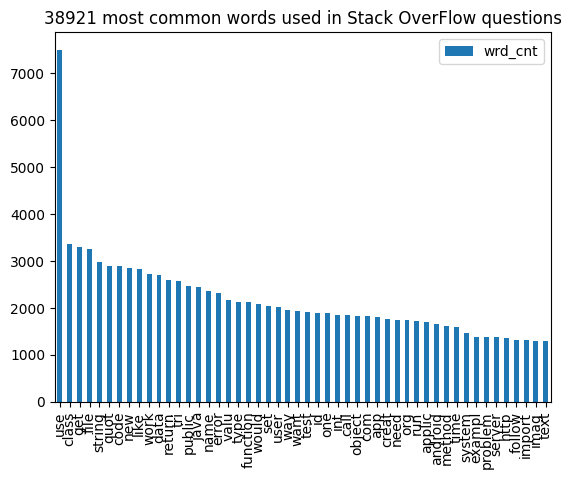

In [9]:
# Recensement des fréquences de mots et suppression des mots trop courants (utilisés pour le code informatique)

string = []
for txt in data['Token']:
  for wrd in txt:
    string.append(wrd)
freq = nltk.FreqDist(string)

for i in range(len(data['Token'])):
  token_lst = data.loc[i,'Token']
  token_red_lst = []
  for wrd in token_lst:
    if not wrd == 'gt' and not wrd == 'lt' : # semblable à max_df de count_vectorizer ?
      token_red_lst.append(wrd)
    data.at[i,'Token_lst_new'] = token_red_lst

string = []
for txt in data['Token_lst_new']:
  for wrd in txt:
    string.append(wrd)
freq_red = nltk.FreqDist(string)

df = pd.DataFrame.from_dict(freq_red, orient='index')
df.rename(columns={0:'wrd_cnt'}, inplace=True)
df.sort_values(by='wrd_cnt',ascending=False)[:50].plot(kind='bar', title='{} most common words used in Stack OverFlow questions'.format(len(freq_red)))

<Axes: title={'center': '23 most common tags used in Stack OverFlow questions'}>

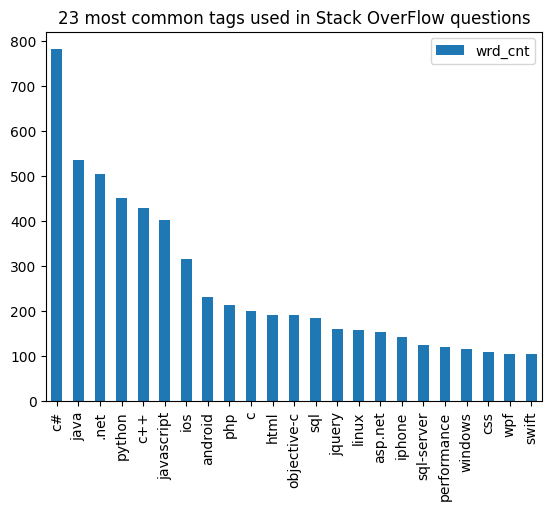

In [17]:
# Recensement des fréquences de tags et suppression des tags trop rares
# pour qu'un modèle puisse avoir suffisamment d'exemples pour apprendre à repérer leur cas

string = []
for txt in data['Tags_lst']:
  for wrd in txt:
    string.append(wrd)
freq = nltk.FreqDist(string)

freq_min = 10 / len(data['Tags_lst'])
# Keep only the tags appearing in at least 10% of posts
# So the model has sufficient info to predict the target tag
# ----------------------------------------------------------------
# Réduction de la taille du jeu de tags
# After building the models, it appears 10% is not enough.
# Now at least 100 appearances is required for a tag to be kept in the ds
# freq_min = 20 / len(data['Tags_lst'])
for i in range(len(data['Tags_lst'])):
  tag_lst = data.loc[i,'Tags_lst']
  tag_min_lst = []
  for wrd in tag_lst:
    if freq.freq(wrd) > freq_min :
      tag_min_lst.append(wrd)
    data.at[i,'Tags_lst_new'] = tag_min_lst

string = []
for txt in data['Tags_lst_new']:
  for wrd in txt:
    string.append(wrd)
freq_red = nltk.FreqDist(string)

df = pd.DataFrame.from_dict(freq_red, orient='index')
df.rename(columns={0:'wrd_cnt'}, inplace=True)
df.sort_values(by='wrd_cnt',ascending=False)[:].plot(kind='bar', title='{} most common tags used in Stack OverFlow questions'.format(len(freq_red)))

In [18]:
df

,wrd_cnt
sql-server,124
c#,781
.net,505
python,451
windows,115
asp.net,154
javascript,403
php,213
html,192
sql,184


In [11]:
data

,Text,Tags,Token,Tags_lst,Tags_lst_new,Token_lst_new
587,Sql Server string to date conversion<p>I want ...,<sql-server><tsql><datetime><sql-server-2005><...,"[sql, server, string, date, convers, want, con...","[sql-server, tsql, datetime, sql-server-2005, ...",[],"[sql, server, string, date, convers, want, con..."
1625,Instantiating a python class in C#<p>I've writ...,<c#><.net><python><ironpython><cross-language>,"[instanti, python, class, c#, written, class, ...","[c#, .net, python, ironpython, cross-language]","[c#, .net]","[instanti, python, class, c#, written, class, ..."
2730,pyserial with multiprocessing gives me a ctype...,<python><python-3.x><multiprocessing><pickle><...,"[pyseri, multiprocess, give, ctype, error, hi,...","[python, python-3.x, multiprocessing, pickle, ...",[],"[pyseri, multiprocess, give, ctype, error, hi,..."
4700,How do I install SciPy on 64 bit Windows?<p>Ho...,<python><windows><64-bit><numpy><scipy>,"[instal, scipi, bit, window, instal, scipi, sy...","[python, windows, 64-bit, numpy, scipy]",[],"[instal, scipi, bit, window, instal, scipi, sy..."
3497,MSBuild doesn't copy references (DLL files) if...,<visual-studio><msbuild><reference><dependenci...,"[msbuild, copi, refer, dll, file, use, project...","[visual-studio, msbuild, reference, dependenci...",[],"[msbuild, copi, refer, dll, file, use, project..."
...,...,...,...,...,...,...
2020,Killing gracefully a .NET Core daemon running ...,<c#><linux><service><daemon><.net-core>,"[kill, grace, .net, core, daemon, run, linux, ...","[c#, linux, service, daemon, .net-core]",[c#],"[kill, grace, .net, core, daemon, run, linux, ..."
3953,What is the difference between super() with ar...,<python><python-3.x><class><pygame><super>,"[differ, super, argument, without, argument, e...","[python, python-3.x, class, pygame, super]",[],"[differ, super, argument, without, argument, e..."
2371,Visual Studio Designer is always trying to cha...,<c#><winforms><visual-studio-2008><user-contro...,"[visual, studio, design, alway, tri, chang, co...","[c#, winforms, visual-studio-2008, user-contro...",[c#],"[visual, studio, design, alway, tri, chang, co..."
2522,How do I draw a shadow under a UIView?<p>I'm t...,<iphone><objective-c><ios><cocoa-touch><core-g...,"[draw, shadow, uiview, tri, draw, shadow, bott...","[iphone, objective-c, ios, cocoa-touch, core-g...",[],"[draw, shadow, uiview, tri, draw, shadow, bott..."


In [ ]:
data.to_csv('/content/drive/MyDrive/OCS/Projet5/msg_preprocessed.csv')

In [19]:
# data.to_csv('/content/drive/MyDrive/OCS/Projet5/msg_preprocessed_reduced.csv')

## Réduction dimensionnelle - Topic modeling avec analyse non supervisée

Latent Dirichlet Allocation

nécessite de lui donner le nb de topics à rechercher
-> à lancer plusieurs fois pour trouver le nb de topics optimum

In [ ]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#8tokenizewordsandcleanuptextusingsimple_preprocess
# Gensim
!pip install gensim==3.8.3
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

!pip install pyLDAvis
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 73.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.8 MB/s eta 0:00:00
  A

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data['Token_lst_new'])

# Create Corpus
texts = data['Token_lst_new']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 3), (27, 1), (28, 1), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 2), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 4), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"int" + 0.034*"amp" + 0.030*"std" + 0.019*"array" + 0.016*"char" + '
  '0.016*"doubl" + 0.013*"const" + 0.013*"float" + 0.013*"memori" + '
  '0.011*"scala"'),
 (1,
  '0.024*"string" + 0.022*"class" + 0.021*"new" + 0.020*"return" + '
  '0.017*"public" + 0.016*"data" + 0.016*"name" + 0.014*"valu" + 0.013*"get" + '
  '0.013*"type"'),
 (2,
  '0.025*"server" + 0.024*"com" + 0.017*"http" + 0.015*"applic" + '
  '0.014*"servic" + 0.014*"connect" + 0.013*"client" + 0.013*"window" + '
  '0.012*"web" + 0.012*".net"'),
 (3,
  '0.043*"quot" + 0.020*"style" + 0.018*"text" + 0.017*"div" + 0.017*"html" + '
  '0.016*"js" + 0.016*"button" + 0.015*"node" + 0.013*"id" + 0.012*"click"'),
 (4,
  '0.033*"use" + 0.015*"like" + 0.012*"work" + 0.011*"one" + 0.010*"would" + '
  '0.010*"way" + 0.009*"need" + 0.009*"code" + 0.009*"want" + 0.007*"time"'),
 (5,
  '0.032*"imag" + 0.031*"self" + 0.020*"view" + 0.018*"io" + 0.016*"width" + '
  '0.016*"background" + 0.016*"color" + 0.012*"bar" + 0.012*"hei

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Token_lst_new'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.679905023625153

Coherence Score:  0.5526476994597382


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            random_state=42,
                            passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data['Token_lst_new'], start=2, limit=20, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


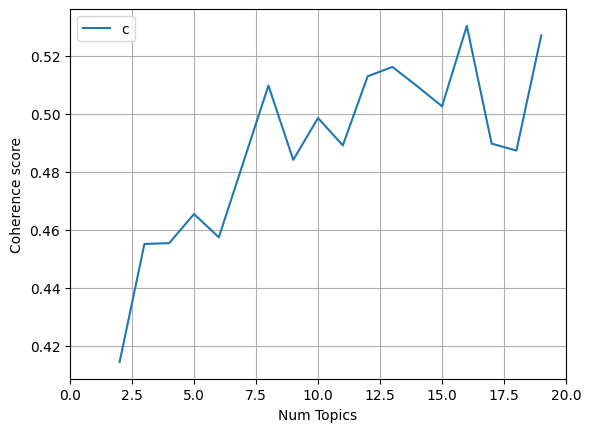

In [ ]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Prédiction des tags non supervisés à partir du topic plus probable et des tags associés à ce topic le plus probable

def predict_unsupervised_tags(text):

  text_bow = id2word.doc2bow(text)
  topics = lda_model.get_document_topics(text_bow)

  best_topic, best_topic_prob = topics[0]
  for i in range(len(topics)):
        if topics[i][1] > best_topic_prob:
            best_topic = topics[i][0]
            best_topic_prob = topics[i][1]
  print(best_topic)
  #retrieve associated to topic tags present in submited text
  potential_tags = lda_model.get_topic_terms(topicid=best_topic, topn=20)
  # print(potential_tags)
  relevant_tags = [id2word[tag[0]] for tag in potential_tags if id2word[tag[0]] in text]

  return relevant_tags


print(data.loc[0,'Token_lst_new'])
print(predict_unsupervised_tags(data.loc[0,'Token_lst_new']))

['calcul', 'roll', 'idxmax', 'consid', 'pd', 'seri', 'import', 'panda', 'pd', 'import', 'numpi', 'np', 'np', 'random', 'seed', 'pd', 'seri', 'np', 'random', 'randint', 'list', 'abcdefghij', 'dtype', 'int64', 'want', 'get', 'index', 'max', 'valu', 'roll', 'window', 'roll', 'max', 'nan', 'nan', 'dtype', 'float64', 'want', 'none', 'none', 'dtype', 'object', 'done', 'roll', 'appli', 'np', 'argmax', 'nan', 'nan', 'dtype', 'float64', 'obvious', 'want']
1
['valu', 'get', 'object', 'list']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
